In [21]:
# Now try to pull the patent data combining 2 files to accumulate 10 years
from google.cloud import storage
import pandas as pd

bucket_name = "steven_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "Patent_EP/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

patent_data_combine = None

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        patent_data = pd.read_csv(file_name) # load the data
        # print(patent_data)
        if patent_data_combine is None:
            patent_data_combine = patent_data
        else:
            patent_data_combine = patent_data_combine.append(patent_data)

In [22]:
patent_data_combine.sort_values('filing_date')

,publication_number,application_number,text,filing_date
51914,EP-2376972-A1,EP-10708886-A,"A parallel-sighted, image-reversing prism syst...",20100102
190052,EP-2393505-A1,EP-10705790-A,The present invention relates to the use of a ...,20100102
248965,EP-2384189-A2,EP-10726819-A,Improved compositions for tissue augmentation ...,20100103
100653,EP-2374013-A2,EP-10708389-A,Apparatus for radiation mapping of a region co...,20100103
54097,EP-2374128-A2,EP-10703964-A,A device for recording at least part of a data...,20100103
...,...,...,...,...
554346,EP-3572574-A1,EP-19193294-A,The present invention relates to home applianc...,20190823
817187,EP-3569717-A2,EP-19194106-A,The present invention is directed to a diagnos...,20190828
817186,EP-3569717-A2,EP-19194106-A,The present invention is directed to a diagnos...,20190828
963623,EP-3564854-A1,EP-19196510-A,Embodiments of the present invention provide a...,20190910


In [23]:
sum(patent_data_combine.duplicated(subset =['application_number'], keep = False)) # no duplicate

728240

In [24]:
patent_dup1 = patent_data_combine[patent_data_combine.duplicated(subset =['application_number'], keep = False)]
patent_dup1

,publication_number,application_number,text,filing_date
156,EP-2976682-A1,EP-14710218-A,An intermittent blocking mechanism (6) for int...,20140306
157,EP-2976682-A1,EP-14710218-A,An intermittent blocking mechanism (6) for int...,20140306
165,EP-2989656-A1,EP-14722295-A,The invention relates to a method for producin...,20140418
166,EP-2989656-A1,EP-14722295-A,The invention relates to a method for producin...,20140418
181,EP-3007956-A1,EP-14725427-A,The invention relates to a vehicle steering wh...,20140520
...,...,...,...,...
338332,EP-2371806-A1,EP-11159825-A,The present invention relates to a process for...,20110325
338333,EP-3389110-A1,EP-18173321-A,Provided is an organic electroluminescence dev...,20100730
338334,EP-3389110-A1,EP-18173321-A,Provided is an organic electroluminescence dev...,20100730
338338,EP-3514244-A1,EP-18214114-A,Provided herein are methods and compositions t...,20100401


In [25]:
728240 / 1565465 

0.46519085383576125

In [26]:
patent_data_combine

,publication_number,application_number,text,filing_date
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106
1,EP-2672813-A1,EP-12744962-A,The invention relates to methods and systems f...,20120209
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104
3,EP-2683052-A1,EP-12754468-A,A charging control system that controls chargi...,20120210
4,EP-2686852-A1,EP-12708252-A,A multi-leaf collimator for radiation therapy ...,20120309
...,...,...,...,...
338335,EP-3299361-A1,EP-17195240-A,Disclosed are novel calcium release-activated ...,20101007
338336,EP-2545964-A1,EP-11005722-A,The present invention relates to compounds whi...,20110713
338337,EP-3121256-A1,EP-16185027-A,The present application relates to perfume del...,20110622
338338,EP-3514244-A1,EP-18214114-A,Provided herein are methods and compositions t...,20100401


In [27]:
patent_data_combine['new_appl_nbr'] = 'EP20' + patent_data_combine['application_number'].str[3:5] + '0' + patent_data_combine['application_number'].str[5:-2]
patent_data_combine

,publication_number,application_number,text,filing_date,new_appl_nbr
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106,EP20120733851
1,EP-2672813-A1,EP-12744962-A,The invention relates to methods and systems f...,20120209,EP20120744962
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104,EP20120748862
3,EP-2683052-A1,EP-12754468-A,A charging control system that controls chargi...,20120210,EP20120754468
4,EP-2686852-A1,EP-12708252-A,A multi-leaf collimator for radiation therapy ...,20120309,EP20120708252
...,...,...,...,...,...
338335,EP-3299361-A1,EP-17195240-A,Disclosed are novel calcium release-activated ...,20101007,EP20170195240
338336,EP-2545964-A1,EP-11005722-A,The present invention relates to compounds whi...,20110713,EP20110005722
338337,EP-3121256-A1,EP-16185027-A,The present application relates to perfume del...,20110622,EP20160185027
338338,EP-3514244-A1,EP-18214114-A,Provided herein are methods and compositions t...,20100401,EP20180214114


In [28]:
# patent_data_combine['new_appl_nbr'] = patent_data_combine['application_number'].replace(to_replace, replace_with, regex = True, inplace = False)
# patent_data_combine

In [29]:
patent_data_unique = patent_data_combine[~patent_data_combine.duplicated(subset = ['application_number'], keep = 'first')]
patent_data_unique

,publication_number,application_number,text,filing_date,new_appl_nbr
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106,EP20120733851
1,EP-2672813-A1,EP-12744962-A,The invention relates to methods and systems f...,20120209,EP20120744962
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104,EP20120748862
3,EP-2683052-A1,EP-12754468-A,A charging control system that controls chargi...,20120210,EP20120754468
4,EP-2686852-A1,EP-12708252-A,A multi-leaf collimator for radiation therapy ...,20120309,EP20120708252
...,...,...,...,...,...
338333,EP-3389110-A1,EP-18173321-A,Provided is an organic electroluminescence dev...,20100730,EP20180173321
338335,EP-3299361-A1,EP-17195240-A,Disclosed are novel calcium release-activated ...,20101007,EP20170195240
338336,EP-2545964-A1,EP-11005722-A,The present invention relates to compounds whi...,20110713,EP20110005722
338337,EP-3121256-A1,EP-16185027-A,The present application relates to perfume del...,20110622,EP20160185027


### merge two daraframes

In [30]:
df_merge = pd.merge(patent_data_unique, df, left_on='new_appl_nbr', right_on='app_nbr', how='inner')
df_merge

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,claims_bwd,fwd_cits5,fwd_cits5_xy,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106,EP20120733851,365234201,EP20120733851,2012,21.0,1,3,4,1573.0,5,0,7.0,NaN,1,1,1,1,NaN,NaN,0.693878,0.924450,0.731707,7.0,0.343840,0.318647
1,EP-2672813-A1,EP-12744962-A,The invention relates to methods and systems f...,20120209,EP20120744962,365788748,EP20120744962,2012,19.0,0,1,12,NaN,7,0,NaN,NaN,1,1,1,1,NaN,NaN,0.000000,0.928395,0.955556,NaN,NaN,NaN
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104,EP20120748862,374794988,EP20120748862,2012,1.0,0,1,4,2625.0,17,2,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.860116,0.585859,7.0,0.235897,0.311538
3,EP-2683052-A1,EP-12754468-A,A charging control system that controls chargi...,20120210,EP20120754468,375211887,EP20120754468,2012,1.0,1,3,3,NaN,8,1,6.0,NaN,1,0,1,0,NaN,NaN,0.000000,0.830247,0.222222,5.0,NaN,NaN
4,EP-2686852-A1,EP-12708252-A,A multi-leaf collimator for radiation therapy ...,20120309,EP20120708252,352312879,EP20120708252,2012,27.0,0,1,2,NaN,5,0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,0.578512,0.545455,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130300,EP-3389110-A1,EP-18173321-A,Provided is an organic electroluminescence dev...,20100730,EP20180173321,494390078,EP20180173321,2010,14.0,1,6,3,NaN,48,11,23.0,NaN,3,1,3,1,NaN,NaN,0.473349,0.837499,0.159533,NaN,NaN,NaN
1130301,EP-3299361-A1,EP-17195240-A,Disclosed are novel calcium release-activated ...,20101007,EP20170195240,484534860,EP20170195240,2010,14.0,1,3,24,NaN,49,29,14.0,NaN,1,1,1,1,NaN,NaN,0.595041,0.861908,0.166667,NaN,NaN,NaN
1130302,EP-2545964-A1,EP-11005722-A,The present invention relates to compounds whi...,20110713,EP20110005722,335666652,EP20110005722,2011,16.0,1,3,28,NaN,17,73,14.0,NaN,1,0,1,0,NaN,NaN,0.653061,0.884549,0.114583,1.0,NaN,NaN
1130303,EP-3121256-A1,EP-16185027-A,The present application relates to perfume del...,20110622,EP20160185027,467867550,EP20160185027,2011,19.0,0,1,6,2730.0,94,2,13.0,NaN,0,0,0,0,NaN,NaN,NaN,0.923904,0.970273,7.0,0.240334,0.296841


Above still has 1.1 million records after the merge. (it was about 1.2 million records before the merge, so majority of them have exact match, a good sign)

In [31]:
# df_merge.to_csv(index=False)  # kernel die here

In [32]:
# See the percentage of null value
df_merge.isnull().sum(axis=0) / df_merge.shape[0]

publication_number    0.000000
application_number    0.000000
text                  0.000166
filing_date           0.000000
new_appl_nbr          0.000000
appln_id              0.000000
app_nbr               0.000000
filing                0.000000
tech_field            0.000998
many_field            0.000000
patent_scope          0.000000
family_size           0.000000
grant_lag             0.645127
bwd_cits              0.000000
npl_cits              0.000000
claims                0.316024
claims_bwd            1.000000
fwd_cits5             0.000000
fwd_cits5_xy          0.000000
fwd_cits7             0.000000
fwd_cits7_xy          0.000000
breakthrough          0.997934
breakthrough_xy       0.997934
generality            0.780621
originality           0.020855
radicalness           0.000000
renewal               0.442816
quality_index_4       0.645192
quality_index_6       0.645192
dtype: float64

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


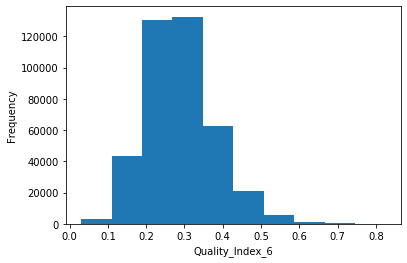

In [34]:
plt.hist(df_merge['quality_index_6'], density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Quality_Index_6');

In [35]:
df_merge['fwd_cits5'].value_counts(dropna = False)

0      882256
1      154467
2       49939
3       20132
4        9475
        ...  
88          1
80          1
71          1
421         1
454         1
Name: fwd_cits5, Length: 113, dtype: int64

In [36]:
df_merge['fwd_cits5'].value_counts(dropna = False) / len(df_merge)

0      7.805468e-01
1      1.366596e-01
2      4.418188e-02
3      1.781112e-02
4      8.382693e-03
           ...     
88     8.847170e-07
80     8.847170e-07
71     8.847170e-07
421    8.847170e-07
454    8.847170e-07
Name: fwd_cits5, Length: 113, dtype: float64

In [37]:
882256 / len(df_merge)

0.780546843551077

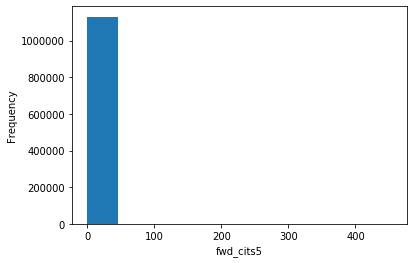

In [38]:
plt.hist(df_merge['fwd_cits5'], density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('fwd_cits5');

### keep only quality_index_6 >= 0

In [39]:
df_merge_quality = df_merge[(df_merge['quality_index_6'] >=0) & (len(df_merge['text']) >0)]
df_merge_quality

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,claims_bwd,fwd_cits5,fwd_cits5_xy,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106,EP20120733851,365234201,EP20120733851,2012,21.0,1,3,4,1573.0,5,0,7.0,NaN,1,1,1,1,NaN,NaN,0.693878,0.924450,0.731707,7.0,0.343840,0.318647
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104,EP20120748862,374794988,EP20120748862,2012,1.0,0,1,4,2625.0,17,2,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.860116,0.585859,7.0,0.235897,0.311538
5,EP-2686915-A1,EP-12707535-A,The invention relates to a plug-in device syst...,20120301,EP20120707535,352155715,EP20120707535,2012,1.0,0,1,7,1119.0,3,0,11.0,NaN,1,0,1,0,NaN,NaN,0.000000,0.716049,0.222222,7.0,0.286282,0.311420
6,EP-2691783-A1,EP-12712227-A,A voltage to current converter is provided for...,20120307,EP20120712227,353099281,EP20120712227,2012,10.0,1,3,5,2604.0,2,7,15.0,NaN,0,0,0,0,NaN,NaN,NaN,0.444444,0.000000,7.0,0.331197,0.221311
7,EP-2692004-A1,EP-12722203-A,PBI-based MEAs for high temperature Polymer El...,20120329,EP20120722203,363978334,EP20120722203,2012,1.0,0,1,5,1910.0,7,2,6.0,NaN,0,0,0,0,NaN,NaN,NaN,0.592798,0.105263,7.0,0.208205,0.249288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130291,EP-2441567-A1,EP-11450105-A,The method involves applying a protective line...,20110819,EP20110450105,337102719,EP20110450105,2011,25.0,1,2,2,1020.0,24,0,14.0,NaN,0,0,0,0,NaN,NaN,NaN,0.799740,0.338235,7.0,0.214575,0.442057
1130295,EP-2977385-A1,EP-15160538-A,The present application relates to humanized a...,20100511,EP20150160538,438312145,EP20150160538,2010,16.0,1,4,39,2787.0,19,14,20.0,NaN,1,0,1,0,NaN,NaN,0.444444,0.920389,0.303644,9.0,0.531250,0.403573
1130297,EP-2345684-A1,EP-11151086-A,"A polymerization method for a polyester resin,...",20110117,EP20110151086,330464397,EP20110151086,2011,17.0,0,1,4,1164.0,41,0,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.858031,0.674419,8.0,0.194444,0.355204
1130299,EP-2371806-A1,EP-11159825-A,Preparing diaryl carbonate comprises: (a) prep...,20110325,EP20110159825,333010463,EP20110159825,2011,14.0,1,2,8,2301.0,55,4,14.0,NaN,2,1,5,2,NaN,NaN,0.000000,0.937514,0.619289,8.0,0.244938,0.265729


In [40]:
conditions = [
    (df_merge_quality['quality_index_6'] >= 0) & (df_merge_quality['quality_index_6'] < 0.3),
    (df_merge_quality['quality_index_6'] >= 0.3) 
]

choices = ['0','1'] # [Steven] to start with 0 to make later to_categorical() produce 5 classes as expected

In [41]:
import numpy as np
df_merge_quality['quality_rank'] = np.select(condlist=conditions, choicelist=choices)
df_merge_quality

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,claims_bwd,fwd_cits5,fwd_cits5_xy,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106,EP20120733851,365234201,EP20120733851,2012,21.0,1,3,4,1573.0,5,0,7.0,NaN,1,1,1,1,NaN,NaN,0.693878,0.924450,0.731707,7.0,0.343840,0.318647,1
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104,EP20120748862,374794988,EP20120748862,2012,1.0,0,1,4,2625.0,17,2,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.860116,0.585859,7.0,0.235897,0.311538,1
5,EP-2686915-A1,EP-12707535-A,The invention relates to a plug-in device syst...,20120301,EP20120707535,352155715,EP20120707535,2012,1.0,0,1,7,1119.0,3,0,11.0,NaN,1,0,1,0,NaN,NaN,0.000000,0.716049,0.222222,7.0,0.286282,0.311420,1
6,EP-2691783-A1,EP-12712227-A,A voltage to current converter is provided for...,20120307,EP20120712227,353099281,EP20120712227,2012,10.0,1,3,5,2604.0,2,7,15.0,NaN,0,0,0,0,NaN,NaN,NaN,0.444444,0.000000,7.0,0.331197,0.221311,0
7,EP-2692004-A1,EP-12722203-A,PBI-based MEAs for high temperature Polymer El...,20120329,EP20120722203,363978334,EP20120722203,2012,1.0,0,1,5,1910.0,7,2,6.0,NaN,0,0,0,0,NaN,NaN,NaN,0.592798,0.105263,7.0,0.208205,0.249288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130291,EP-2441567-A1,EP-11450105-A,The method involves applying a protective line...,20110819,EP20110450105,337102719,EP20110450105,2011,25.0,1,2,2,1020.0,24,0,14.0,NaN,0,0,0,0,NaN,NaN,NaN,0.799740,0.338235,7.0,0.214575,0.442057,1
1130295,EP-2977385-A1,EP-15160538-A,The present application relates to humanized a...,20100511,EP20150160538,438312145,EP20150160538,2010,16.0,1,4,39,2787.0,19,14,20.0,NaN,1,0,1,0,NaN,NaN,0.444444,0.920389,0.303644,9.0,0.531250,0.403573,1
1130297,EP-2345684-A1,EP-11151086-A,"A polymerization method for a polyester resin,...",20110117,EP20110151086,330464397,EP20110151086,2011,17.0,0,1,4,1164.0,41,0,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.858031,0.674419,8.0,0.194444,0.355204,1
1130299,EP-2371806-A1,EP-11159825-A,Preparing diaryl carbonate comprises: (a) prep...,20110325,EP20110159825,333010463,EP20110159825,2011,14.0,1,2,8,2301.0,55,4,14.0,NaN,2,1,5,2,NaN,NaN,0.000000,0.937514,0.619289,8.0,0.244938,0.265729,0


In [42]:
df_merge_quality['quality_rank'].value_counts()

0    236469
1    164572
Name: quality_rank, dtype: int64

In [44]:
df_merge_quality['abstract_length'] =  df_merge_quality['text'].str.split().str.len()
df_merge_quality

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,claims_bwd,fwd_cits5,fwd_cits5_xy,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,abstract_length
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106,EP20120733851,365234201,EP20120733851,2012,21.0,1,3,4,1573.0,5,0,7.0,NaN,1,1,1,1,NaN,NaN,0.693878,0.924450,0.731707,7.0,0.343840,0.318647,1,120.0
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104,EP20120748862,374794988,EP20120748862,2012,1.0,0,1,4,2625.0,17,2,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.860116,0.585859,7.0,0.235897,0.311538,1,169.0
5,EP-2686915-A1,EP-12707535-A,The invention relates to a plug-in device syst...,20120301,EP20120707535,352155715,EP20120707535,2012,1.0,0,1,7,1119.0,3,0,11.0,NaN,1,0,1,0,NaN,NaN,0.000000,0.716049,0.222222,7.0,0.286282,0.311420,1,140.0
6,EP-2691783-A1,EP-12712227-A,A voltage to current converter is provided for...,20120307,EP20120712227,353099281,EP20120712227,2012,10.0,1,3,5,2604.0,2,7,15.0,NaN,0,0,0,0,NaN,NaN,NaN,0.444444,0.000000,7.0,0.331197,0.221311,0,86.0
7,EP-2692004-A1,EP-12722203-A,PBI-based MEAs for high temperature Polymer El...,20120329,EP20120722203,363978334,EP20120722203,2012,1.0,0,1,5,1910.0,7,2,6.0,NaN,0,0,0,0,NaN,NaN,NaN,0.592798,0.105263,7.0,0.208205,0.249288,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130291,EP-2441567-A1,EP-11450105-A,The method involves applying a protective line...,20110819,EP20110450105,337102719,EP20110450105,2011,25.0,1,2,2,1020.0,24,0,14.0,NaN,0,0,0,0,NaN,NaN,NaN,0.799740,0.338235,7.0,0.214575,0.442057,1,71.0
1130295,EP-2977385-A1,EP-15160538-A,The present application relates to humanized a...,20100511,EP20150160538,438312145,EP20150160538,2010,16.0,1,4,39,2787.0,19,14,20.0,NaN,1,0,1,0,NaN,NaN,0.444444,0.920389,0.303644,9.0,0.531250,0.403573,1,30.0
1130297,EP-2345684-A1,EP-11151086-A,"A polymerization method for a polyester resin,...",20110117,EP20110151086,330464397,EP20110151086,2011,17.0,0,1,4,1164.0,41,0,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.858031,0.674419,8.0,0.194444,0.355204,1,101.0
1130299,EP-2371806-A1,EP-11159825-A,Preparing diaryl carbonate comprises: (a) prep...,20110325,EP20110159825,333010463,EP20110159825,2011,14.0,1,2,8,2301.0,55,4,14.0,NaN,2,1,5,2,NaN,NaN,0.000000,0.937514,0.619289,8.0,0.244938,0.265729,0,209.0


In [45]:
df_merge_quality['abstract_length'].sort_values()

1077697    1.0
354089     4.0
749113     4.0
1075855    4.0
1064749    4.0
          ... 
1102307    NaN
1110391    NaN
1113237    NaN
1117169    NaN
1120964    NaN
Name: abstract_length, Length: 401041, dtype: float64

In [46]:
sum(df_merge_quality['abstract_length'].isnull())

54

In [47]:
df_merge_quality['abstract_length'].describe()

count    400987.000000
mean        124.525511
std          56.244370
min           1.000000
25%          86.000000
50%         121.000000
75%         153.000000
max        1194.000000
Name: abstract_length, dtype: float64

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


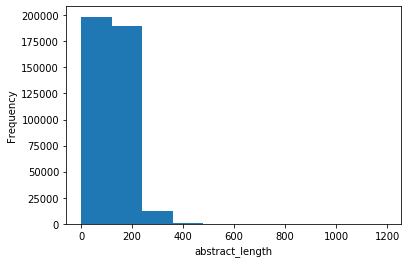

In [48]:
plt.hist(df_merge_quality['abstract_length'], density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('abstract_length');

### Create a model

In [50]:
import numpy as np
import pandas as pd
import pickle as cPickle
from collections import defaultdict
import re

from bs4 import BeautifulSoup

import sys
import os
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model

from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers

In [51]:
# more CNN library
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant


In [52]:
MAX_SEQUENCE_LENGTH = 500  # [Steven] I added for the CNN, to take only the 500 words.
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000  # [Steven] this should be number of unique word / vocabulary
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [53]:
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\\", "", str(string))    
    string = re.sub(r"\'", "", str(string))    
    string = re.sub(r"\"", "", str(string))    
    return string.strip().lower()

In [55]:
data_train = df_merge_quality
data_train

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,claims_bwd,fwd_cits5,fwd_cits5_xy,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,abstract_length
0,EP-2664454-A1,EP-12733851-A,Disclosed is a metal-rubber laminate material ...,20120106,EP20120733851,365234201,EP20120733851,2012,21.0,1,3,4,1573.0,5,0,7.0,NaN,1,1,1,1,NaN,NaN,0.693878,0.924450,0.731707,7.0,0.343840,0.318647,1,120.0
2,EP-2680351-A1,EP-12748862-A,[Problem] To provide a method for producing a ...,20120104,EP20120748862,374794988,EP20120748862,2012,1.0,0,1,4,2625.0,17,2,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.860116,0.585859,7.0,0.235897,0.311538,1,169.0
5,EP-2686915-A1,EP-12707535-A,The invention relates to a plug-in device syst...,20120301,EP20120707535,352155715,EP20120707535,2012,1.0,0,1,7,1119.0,3,0,11.0,NaN,1,0,1,0,NaN,NaN,0.000000,0.716049,0.222222,7.0,0.286282,0.311420,1,140.0
6,EP-2691783-A1,EP-12712227-A,A voltage to current converter is provided for...,20120307,EP20120712227,353099281,EP20120712227,2012,10.0,1,3,5,2604.0,2,7,15.0,NaN,0,0,0,0,NaN,NaN,NaN,0.444444,0.000000,7.0,0.331197,0.221311,0,86.0
7,EP-2692004-A1,EP-12722203-A,PBI-based MEAs for high temperature Polymer El...,20120329,EP20120722203,363978334,EP20120722203,2012,1.0,0,1,5,1910.0,7,2,6.0,NaN,0,0,0,0,NaN,NaN,NaN,0.592798,0.105263,7.0,0.208205,0.249288,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130291,EP-2441567-A1,EP-11450105-A,The method involves applying a protective line...,20110819,EP20110450105,337102719,EP20110450105,2011,25.0,1,2,2,1020.0,24,0,14.0,NaN,0,0,0,0,NaN,NaN,NaN,0.799740,0.338235,7.0,0.214575,0.442057,1,71.0
1130295,EP-2977385-A1,EP-15160538-A,The present application relates to humanized a...,20100511,EP20150160538,438312145,EP20150160538,2010,16.0,1,4,39,2787.0,19,14,20.0,NaN,1,0,1,0,NaN,NaN,0.444444,0.920389,0.303644,9.0,0.531250,0.403573,1,30.0
1130297,EP-2345684-A1,EP-11151086-A,"A polymerization method for a polyester resin,...",20110117,EP20110151086,330464397,EP20110151086,2011,17.0,0,1,4,1164.0,41,0,10.0,NaN,0,0,0,0,NaN,NaN,NaN,0.858031,0.674419,8.0,0.194444,0.355204,1,101.0
1130299,EP-2371806-A1,EP-11159825-A,Preparing diaryl carbonate comprises: (a) prep...,20110325,EP20110159825,333010463,EP20110159825,2011,14.0,1,2,8,2301.0,55,4,14.0,NaN,2,1,5,2,NaN,NaN,0.000000,0.937514,0.619289,8.0,0.244938,0.265729,0,209.0


In [56]:
data_train = df_merge_quality.sample(frac=1)[:5000]

import nltk
nltk.download('punkt')

In [57]:
data_train.shape

(5000, 31)

In [58]:
import nltk
from nltk import tokenize

abstracts = [] # abstracts is list of list of list to hold each sentences of each abstract (the most complete data)
labels = [] # label is just a list holding our label which is quality_index
texts = []  # texts to hold each complete abstract as list of list (note: abstract not breaking up to sentence level)
for idx in range(data_train.text.shape[0]): # for each row
    #text = BeautifulSoup(data_train.text[idx])
    #print(clean_str(str(data_train.iloc[idx]['text'])))
    text = clean_str(str(data_train.iloc[idx]['text'])) # text is each complete abstract
    texts.append(text) # texts to hold each complete abstract as list of string (note: abstract not breaking up to sentence level)
    sentences = tokenize.sent_tokenize(text) # sentences is list of string holding each complete sentence of one abstract (but it's just an intermediate variable, not used directly in later code)
    abstracts.append(sentences) # abstracts is list of list of string to hold each sentences of each abstract (the most complete data) (this is what we use )
    labels.append(data_train.iloc[idx]['quality_rank']) # label is just a list holding our label which is quality_index

In [62]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS) # intend to use next line .fit_on_texts to index each word within specific abstract at current iteration/loop, the more frequent word has lower index number, it is a dictionary format, it's like a unique vocabulary index
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
# data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

In [63]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 17480 unique tokens.


In [64]:
len(sequences)

5000

In [65]:
#sequences

In [66]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post') # The default is pre-padding, should I try post-padding ? => padding='post', truncating='post'. I think it has to do with whether the beginning words are more important, or later words more important. You may want to try both approaches and compare result?
data

array([[   1,   53,   26, ...,    0,    0,    0],
       [   1,   53,   26, ...,    0,    0,    0],
       [   1,   26,   35, ...,    0,    0,    0],
       ...,
       [   2,  133,  892, ...,    0,    0,    0],
       [   2, 4012,   76, ...,    0,    0,    0],
       [   2,   29,    3, ...,    0,    0,    0]], dtype=int32)

In [67]:
data.shape

(5000, 500)

In [68]:
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (5000, 500)
Shape of label tensor: (5000, 2)


In [69]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

In [70]:
x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

print('Number of positive and negative reviews in traing and validation set')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))


Number of positive and negative reviews in traing and validation set
[2306. 1694.]
[593. 407.]


In [73]:
# import GloVe word embedding
GLOVE_DIR = "data/glove"
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [74]:
print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


In [75]:
len(word_index) + 1

17481

In [76]:
# prepare embedding matrix
num_words = min(MAX_NB_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))  # EMBEDDING_DIM = 100 since we import 100d GloVe
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [77]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
import os, sys, re, json, time, datetime, shutil
from numpy.random import seed
seed(5)
import tensorflow
tensorflow.random.set_seed(5)


In [81]:
# Parameter setting
epochs = 10
embed_dim = EMBEDDING_DIM  # already specify with EMBEDDING_DIM variable above
dense_layer_dims = [100]
dropout_rate = 0.2
num_filters = [100, 100, 100]
kernel_sizes = [48, 50, 52]
num_classes = labels.shape[1] # 

# Model building
start_time = time.time()
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
h = embedding_layer(sequence_input) # remember embedding_layer assign with GloVe's weight

conv_layers_for_all_kernel_sizes = []
counter = 0
for kernel_size, filters in zip(kernel_sizes, num_filters): 
    conv_layer = keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(h)
    conv_layer = keras.layers.GlobalMaxPooling1D()(conv_layer)
    conv_layers_for_all_kernel_sizes.append(conv_layer)
    counter += 1
    #print(conv_layers_for_all_kernel_sizes)
if counter == 1: # need this since layers.concatenate throw error when there is only 1 item in conv_layers_for_all_kernel_sizes
    h = conv_layer
else:
    h = keras.layers.concatenate(conv_layers_for_all_kernel_sizes, axis=1) # Concat the feature maps from each different size.

    h = keras.layers.Dropout(rate=dropout_rate)(h) # Dropout can help with overfitting (improve generalization) by randomly 0-ing different subsets of values in the vector

for dim in dense_layer_dims:
    h = keras.layers.Dense(dim, activation = 'relu')(h) # [Steven] I believe this add additional fully-connected hidden layer with the hope to increase model accuracy

prediction = keras.layers.Dense(num_classes, activation='softmax')(h)

model = keras.Model(inputs=sequence_input, outputs=prediction)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])        # What metric to output as we train.

# train
model.reset_states()
model.fit(x_train, 
          y_train, 
          epochs=epochs, 
          validation_data=(x_val, y_val))


Epoch 1/10
125/125 [==============================] - 261s 2s/step - loss: 0.8355 - accuracy: 0.5383 - val_loss: 0.7200 - val_accuracy: 0.4730
Epoch 2/10
125/125 [==============================] - 260s 2s/step - loss: 0.6617 - accuracy: 0.6012 - val_loss: 0.7664 - val_accuracy: 0.4410
Epoch 3/10
125/125 [==============================] - 260s 2s/step - loss: 0.6019 - accuracy: 0.6708 - val_loss: 0.7674 - val_accuracy: 0.4610
Epoch 4/10
125/125 [==============================] - 260s 2s/step - loss: 0.4820 - accuracy: 0.7830 - val_loss: 0.7135 - val_accuracy: 0.5520
Epoch 5/10
125/125 [==============================] - 261s 2s/step - loss: 0.2970 - accuracy: 0.8860 - val_loss: 0.8273 - val_accuracy: 0.5770
Epoch 6/10
125/125 [==============================] - 262s 2s/step - loss: 0.1098 - accuracy: 0.9688 - val_loss: 0.9266 - val_accuracy: 0.5630
Epoch 7/10
125/125 [==============================] - 260s 2s/step - loss: 0.0619 - accuracy: 0.9843 - val_loss: 0.9474 - val_accuracy: 0.5760